#Univariate Forecast

  - A univariate time series, as the name suggests, is a series with a single time-dependent variable. For example, if you are tracking hourly temperature values for a given region and want to forecast the future temperature using historical temperatures, this is univariate time series forecasting.



# Multivariate Forecast

  - On the other hand, a Multivariate time series has more than one time-dependent variable. Each variable depends not only on its past values but also has some dependency on other variables. This dependency is used for forecasting future values.

When we are dealing with multivariate time series forecasting, the input variables can be of two types:

  - Exogenous: Input variables that are not influenced by other input variables and on which the output variable depends.

  - Endogenous: Input variables that are influenced by other input variables and on which the output variable depends.

#Time Series Forecasting Methods

Time series forecasting can broadly be categorized into the following categories:

  - Classical / Statistical Models — Moving Averages, Exponential Smoothing, ARIMA, SARIMA, TBATS

  - Machine Learning — Linear Regression, XGBoost, Random Forest, or any ML model with reduction methods

  - Deep Learning — RNN, LSTM, Darts Models

# Main Variables in Time Series Forecasting

## Level

  - The most common integrant in every time series data is the level. It is nothing but the mean or average value in the time series. It has 0 variances when plotted against itself.

  ## Trend
  
  - The trend is also one of the most important factors which describe that there is certainly increasing or decreasing trend time series, which actually means the value of organization or sales over a period of time and seasonality is increasing or decreasing.

## Seasonality

  - Seasonality is a simple term that means while predicting a time series data there are some months in a particular domain where the output value is at a peak as compared to other months. for example if you observe the data of tours and travels companies of past 3 years then you can see that in November and December the distribution will be very high due to holiday season and festival season. So while forecasting time series data we need to capture this seasonality.

## Noise

  -  A irregularity or noise is a randomly occurring integrant, and it’s optional and arrives under observation if and only if the features are not correlated with each other and, most importantly, variance is the similar across the series. Noise can lead to dirty and messy data and hinder forecasting, hence noise removal or at least reduction is a very important part of the time series data pre-processing stage.

## Cyclicity

  - A particular time-series pattern that repeats itself after a large gap or interval of time, like months, years, or even decades.

  ## Unexpected Events
  
  - Unexpected events mean some dynamic changes occur in an organization, or in the market which cannot be captured. for example a current pandemic we are suffering from, and if you observe the Sensex or nifty chart there is a huge decrease in stock price which is an unexpected event that occurs in the surrounding.

  - Methods and algorithms are using which we can capture seasonality and trend But the unexpected event occurs dynamically so capturing this becomes very difficult.

# Time Series Methodologies



## The Additive Methodology —

When the time series trend is a linear relationship between integrants, i.e., the frequency (width) and amplitude(height) of the series are the same, the additive rule is applied.

Additive methodology is used when we have a time series where seasonal variation is linear or constant over timestamps.

It can be represented as follows-

$y(t)$ or $x(t) = level + trend + seasonality + noise$

where the model y(multivariate) or x(univariate) is a function of time t.

## The Multiplicative Methodology

  - When the time series is not a linear relationship between integrants, then modelling is done following the multiplicative rule.

  - The multiplicative methodology is used when we have a time series where seasonal variation increases with time, which may be exponential or quadratic.

It is represented as:

$y(t)$ or $x(t)= Level * Trend * Seasonality * Noise$

# Practical Example

  - Daily Female Births Dataset

## Imports

In [ ]:
import numpy as np
import pandas as pd
import statsmodels as stats
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import datetime

## Data Extraction

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-total-female-births.csv',
                   parse_dates=True,
                   header=0,
                   squeeze=True)
data.columns, data.shape

<ipython-input-30-5d49b86aa643>:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  data = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-total-female-births.csv',


(Index(['Date', 'Births'], dtype='object'), (365, 2))

In [ ]:
data.head()

,Date,Births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [ ]:
data.rename(columns={'Date':'date', 'Births':'births'}, inplace=True)
data.columns

Index(['date', 'births'], dtype='object')

## EDA (Exploratory Data Analysis)

In [ ]:
data.describe()

,births
count,365.000000
mean,41.980822
std,7.348257
min,23.000000
25%,37.000000
50%,42.000000
75%,46.000000
max,73.000000


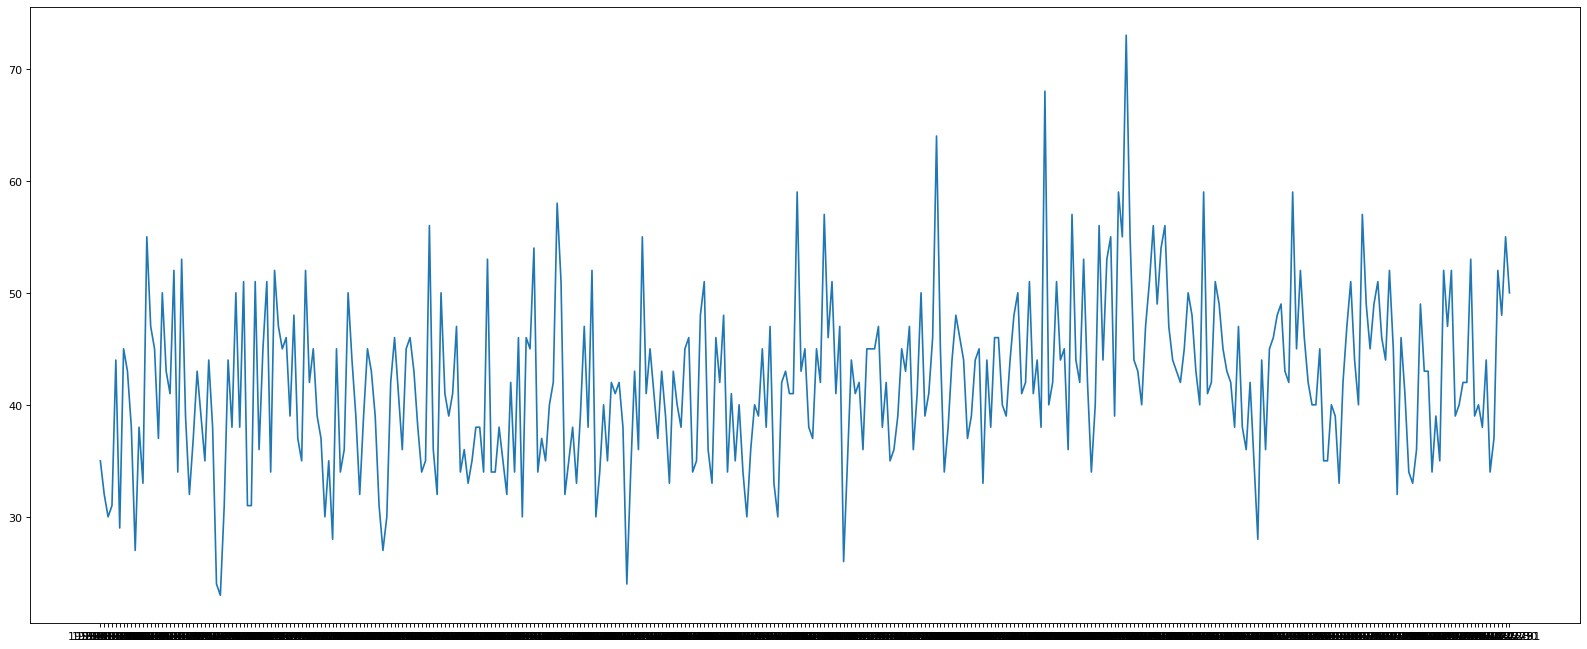

In [ ]:
from matplotlib.pyplot import figure

figure(figsize=(25, 10), dpi=80)

plt.plot(data['date'], data['births'])
plt.show()

## Scale and Normalize Time Series Data

  - A normalized data scales the numeric features in the training data in the range of 0 and 1 so that gradient descent and loss optimization is fast and efficient and converges quickly to the local minimum. Interchangeably known as feature scaling, it is crucial for any ML problem statement.

In [ ]:
data1 = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv',
                    parse_dates=True,
                    header=0,
                    squeeze=True)
data1.head()

<ipython-input-35-3a0350059817>:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  data1 = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv',


,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [ ]:
data1.columns, data1.shape

(Index(['Date', 'Temp'], dtype='object'), (3650, 2))

In [ ]:
data1.rename(columns={'Date':'date', 'Temp':'temp'}, inplace=True)
data1.columns

Index(['date', 'temp'], dtype='object')

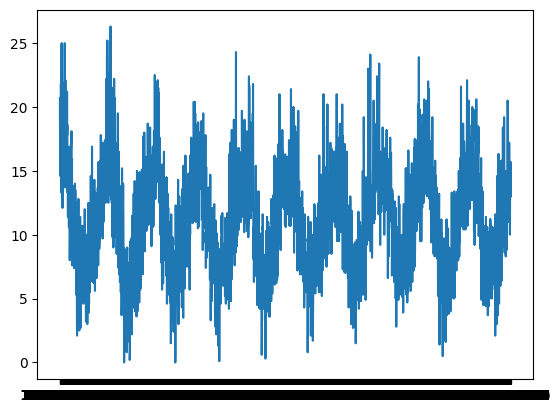

<Figure size 1260x720 with 0 Axes>

In [ ]:
plt.plot(data1['date'], data1['temp'])

figure(figsize=(14, 8), dpi=90)

plt.show()

  - The normalization code:

In [ ]:
#importing necessary libraries
from sklearn.preprocessing import MinMaxScaler

#convert data into matrix of row-col vectors
values = data1['temp'].values
values = values.reshape((len(values), 1))
print(values)
print(values.shape)

#feature scaling
scaler = MinMaxScaler(feature_range=(0, 1))

#fit the scaler with the train data to get min-max values
scaler = scaler.fit(values)
print('Min: %f, Max: %f' % (scaler.data_min_, scaler.data_max_))

#normalize the data and sanity check
normalized = scaler.transform(values)
for i in range(5):
  print(normalized[i])

#inverse transform to obtain original values
original_matrix = scaler.inverse_transform(normalized)

#sanity check
for i in range(5):
  print(original_matrix[i])

[[20.7]
 [17.9]
 [18.8]
 ...
 [13.5]
 [15.7]
 [13. ]]
(3650, 1)
Min: 0.000000, Max: 26.300000
[0.78707224]
[0.68060837]
[0.7148289]
[0.55513308]
[0.60076046]
[20.7]
[17.9]
[18.8]
[14.6]
[15.8]


  — In our case, our data does not have outliers present and hence a MinMaxScaler solves the purpose well. In the case where you have an unsupervised learning approach, and your data contains outliers, it is better to go for standardization, which is more robust than normalization, as normalization scales the data close to the mean which doesn’t handle or include outliers leading to a poor model. Standardization, on the other hand, takes large intervals with a standard deviation value of 1 and a mean of 0, thus outlier handling is robust.

## Extracting Useful Features from Time-Series Data (Feature Engineering)



  - Framing data into a supervised learning problem simply deals with the task of handling and extracting useful features and discarding irrelevant features to make the model robust and cost-efficient.

  - We already know that supervised learning problems have 2 types of features, the independents (x) and dependent/target(y). Hence, how better the target value is achieved depends on how well we choose and engineer the independent features.

  - You must know by now that univariate time-series data has two columns, timestamp, and its respective value. So, it is very self-explanatory that in the time series problem, the independent feature is time and the dependent feature is value.

  - Now let us look at what are the features that need to be engineered into these input and output values so that the inherent relationship between these two variables is established to make the forecasting as good as possible.



The features which are extremely important to model the relationship between the input and output variables in a time series are:

  - 1. Descriptive Statistical Features — Quite straightforward as it sounds, calculating the statistical details and summary of any data is extremely important. Mean, Median, Standard Deviation, Quantiles, and min-max values. These come extremely handy while in tasks such as outlier detection, scaling and normalization, recognizing the distribution, etc.

  - 2. Window Statistic Features — Window features are a statistical summary of different statistical operations upon a fixed window size of previous timestamps. There are, in general, 2 ways to extract descriptive statistics from windows. They are

    - (a) Rolling Window Statistics: The rolling window focuses on calculating rolling means or what we conventionally call Moving Average, and often other statistical operations. This calculates summary statistics (mostly mean) across values within a specific sliding window, and then we can assign these as features in our dataset.

Let, the mean at timestamp t-1 is x and t-2 be y, so we find the average of x and y to predict the value at timestamp t+1. The rolling window hence takes a mean of 2 values to predict the 3rd value. After that is done, the window shifts to the next set of values, and hence the mean is calculated for each window consisting of 2 values. We use rolling window statistics more often when the recent data is more important for forecasting and not previous data.

Let’s see how we can calculate moving or rolling average with a rolling window

In [ ]:
import pandas as pd

df = pd.DataFrame(data1.values)
tshifts = df.shift(1)
rwin = tshifts.rolling(window=2)
moving_avg = rwin.mean()
joined_df = pd.concat([moving_avg, df], axis=1)
joined_df.columns = ['mean(t-2, t-1)', 'date', 't+1']
print(joined_df.head())

   mean(t-2, t-1)        date   t+1
0             NaN  1981-01-01  20.7
1             NaN  1981-01-02  17.9
2           19.30  1981-01-03  18.8
3           18.35  1981-01-04  14.6
4           16.70  1981-01-05  15.8


<ipython-input-57-f61b9368d332>:6: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Int64Index([0], dtype='int64')
  moving_avg = rwin.mean()


  -(b) Expanding Window Statistics: Almost similar to the rolling window, expanding windows takes into account an extra habit of extracting the predicted value as well as all the previous observations, each time it expands. This is beneficial when the previous data is equally important for forecasting as well as the recent data.

In [ ]:
window = tshifts.expanding()
joined_df2 = pd.concat([rwin.mean(), df.shift(-1)], axis=1)
joined_df2.columns = ['mean', 'date', 't+1']
print(joined_df2.head())

    mean        date   t+1
0    NaN  1981-01-02  17.9
1    NaN  1981-01-03  18.8
2  19.30  1981-01-04  14.6
3  18.35  1981-01-05  15.8
4  16.70  1981-01-06  15.8


<ipython-input-58-ab216048c898>:2: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Int64Index([0], dtype='int64')
  joined_df2 = pd.concat([rwin.mean(), df.shift(-1)], axis=1)


  - 3. Lag Features — Lag is simply predicting the value at timestamp t+1, provided we know the value at the previous timestamp, say, t-1. It’s simply distance or lag between two values at 2 different timestamps.

  - 4. Datetime Features — This is simply the conversion of time into its specific components like a month, or day, along with the value of temperature for better forecasting. By doing this, we can gather specific information about the month and day at a particular timestamp for each record.

  - 5. Timestamp Decomposition — Timestamp decomposition includes breaking down the timestamp into subset columns of timestamp for storing unique and special timestamps. Before Diwali or, say, Christmas, the sale of crackers and Santa-caps, fruit-cakes increases exponentially more than at other times of the year. So storing such a special timestamp by decomposing the original timestamp into subsets is useful for forecasting.

## Time Series Data Stationarity Check

  - Stationary, as the term suggests, is consistent. In time-series, the data if it does not contain seasonality or trends is termed stationary. Any other time-series data that has a specific trend or seasonality, are, thus, non-stationary.

Stationarity in time-series is noticeable in 3 types :

  - (a) Trend Stationary: This kind of time-series data possesses no trend.

  - (b) Seasonality Stationary: This kind of time-series data possesses no seasonality factor.

  - (c) Strictly Stationary: The time-series data is strictly consistent with almost no variance to drifts.

### Case 1: Stationary Proof

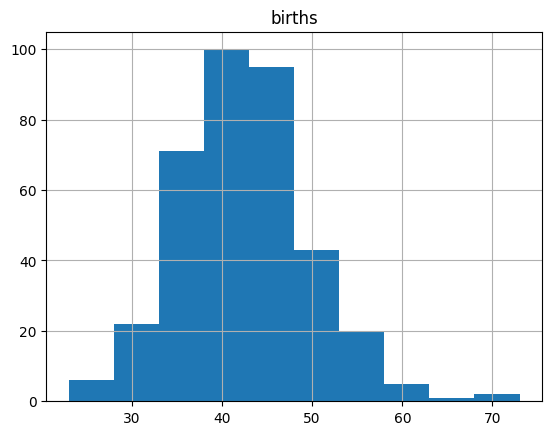

In [ ]:
#Female births data
data.hist()
plt.show()

  - By visualizing the graphics we see that this data has a gaussian distribution, hence, the series is stationary


  More solid proof:

In [ ]:
X = data['births'].values
seq = round(len(X)/2)
X1, X2 = X[0:seq], X[seq:]

meanx1, meanx2 = X1.mean(), X2.mean()
varx1, varx2 = X1.var(), X2.var()

print('mean x1=%f, mean x2=%f' % (meanx1, meanx2))
print('variance x1=%f, variance x2=%f' % (varx1, varx2))

mean x1=39.763736, mean x2=44.185792
variance x1=49.213410, variance x2=48.708651


The mean and variances linger around each other, which clearly shows the data is invariant and hence, stationary

### Case 2— Non-Stationary Proof

<ipython-input-71-faba8b730891>:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  data2 = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv',


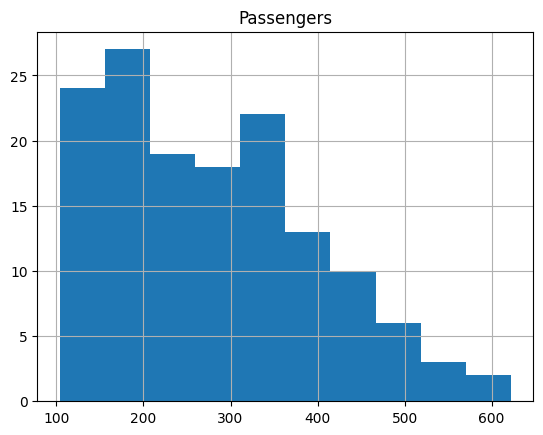

In [ ]:
data2 = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv',
                    parse_dates=True,
                    header=0,
                    squeeze=True)
data2.hist()
plt.show()

The graph pretty much gives a seasonal taste. Moreover, it is too distorted for a Gaussian tag. Let’s now quickly get the mean-variance gaps.

In [ ]:
data2.rename(columns={'Month':'month', 'Passengers':'passengers'}, inplace=True)
data2.columns

Index(['month', 'passengers'], dtype='object')

In [ ]:
X = data2['passengers'].values
seq = round(len(X) / 2)
x1, x2 = X[0:seq], X[seq:]
meanx1, meanx2 = x1.mean(), x2.mean()
varx1, varx2 = x1.var(), x2.var()

print('mean x1=%f, mean x2=%f' % (meanx1, meanx2))
print('variance x1=%f, variance x2=%f' % (varx1, varx2))

mean x1=182.902778, mean x2=377.694444
variance x1=2244.087770, variance x2=7367.962191


The big value gap between mean and variances are pretty self-explanatory to pick the non-stationary kind.